# The Intro to Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Data Structure for Neural Network

In [2]:
# Value Object

class Value:
    
    def __init__(self,data):
        self.data = data
        
    # represent nicer looking expressions    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, otherObj):
        # return NEW Value Obj 
        out = Value(self.data + otherObj.data)
        return out
    
    def __mul__(self, otherObj):
        out = Value(self.data * otherObj.data)
        return out
    
    def __sub__(self, otherObj):
        out = Value(self.data - otherObj.data)
        return out

In [3]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
print(a,b)

Value(data=2.0) Value(data=-3.0)


In [4]:
print(type(a))

<class '__main__.Value'>


In [5]:
print(a + b) 
# internally python will call
# a.__add__(b)

Value(data=-1.0)


In [6]:
newObj = a + b
print(newObj)

Value(data=-1.0)


In [7]:
print(a * b)

Value(data=-6.0)


In [8]:
print(a - b)

Value(data=5.0)


In [9]:
print(a*b + c)

Value(data=4.0)


In [10]:
# internally
print((a.__mul__(b)).__add__(c))

Value(data=4.0)


In [11]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

# expression
d = a*b + c

In [12]:
print(d)

Value(data=4.0)


# Updating Value Obj

### let's see connected tissue of expressions
### i.e what value produce what another value

In [13]:
# Value Obj

class Value:
    
    def __init__( self, data, _children=(), _op='' ):
        self.data = data
        self._prev = set(_children)
        self._op = _op # operation
        
    # represents nicer looking expressions    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, otherObj):
        out = Value(self.data + otherObj.data, (self, otherObj), '+' )
        return out
    
    def __mul__(self, otherObj):
        out = Value(self.data * otherObj.data, (self, otherObj), '*')
        return out
    
    def __sub__(self, otherObj):
        out = Value(self.data - otherObj.data, (self, otherObj), '-')
        return out

In [14]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

# expression
d = a*b + c
print(d)

Value(data=4.0)


In [15]:
print(d._prev)

# a*b = -6,0
# c = 10.0

{Value(data=-6.0), Value(data=10.0)}


In [16]:
print(d._op)

+


In [17]:
print(a._prev)
# empty set --> 'cause its not produce from previous expression

set()


In [18]:
z = a*b
print(z)
print("Operation: ", z._op)
print(f"{z._prev = }")

Value(data=-6.0)
Operation:  *
z._prev = {Value(data=-3.0), Value(data=2.0)}


# Step 1: Install Graphviz binary

## Windows:

1. Download Graphviz from [Graphviz website](http://www.graphviz.org/download/).
2. Add the following paths to the PATH environment variable (replace `{graphviz_version}` with the installed Graphviz version):
    - `C:\Program Files (x86)\Graphviz{graphviz_version}\bin`
    - `C:\Program Files (x86)\Graphviz{graphviz_version}\bin\dot.exe`
3. Close any opened Jupyter notebook and the command prompt.
4. Restart Jupyter or the command prompt and test.

## Linux:

1. Update package information:
    ```bash
    sudo apt-get update
    ```
2. Install Graphviz:
    ```bash
    sudo apt-get install graphviz
    ```
    or build it manually from [Graphviz website](http://www.graphviz.org/download/).

# Step 2: Install graphviz module for python

## pip:

```bash
pip install graphviz
```

 # Graph Tracing Explanation

The provided Python code snippet demonstrates a function for tracing a graph using the Graphviz library. Let's break down its functionality:

1. **Importing Dependencies**:
    - `from graphviz import Digraph`: This line imports the `Digraph` class from the Graphviz library, which is used to represent directed graphs.

2. **Defining the Trace Function**:
    - `def trace(root)`: This function, named `trace`, is defined to trace a graph starting from a given root node.

3. **Inside the Trace Function**:
    - **Initializing Nodes and Edges**:
        - `nodes, edges = set(), set()`: Two empty sets, `nodes` and `edges`, are initialized to store the nodes and edges of the graph, respectively.

    - **Defining the Build Function**:
        - `def build(value)`: This function, `build`, is an inner function of `trace` responsible for recursively traversing the graph from a given node.

    - **Checking Node Existence**:
        - `if value not in nodes:`: This condition checks if the current node `value` is not already in the set of nodes. If not, it adds the node to the `nodes` set.

    - **Traversing Through Predecessors**:
        - `for child in value._prev:`: This loop iterates over the predecessors (or parents) of the current node `value`, as stored in the `_prev` attribute of the `value` object.

    - **Adding Edges**:
        - `edges.add((child, value))`: For each predecessor `child`, it adds an edge from `child` to `value` to the set of `edges`.

    - **Recursive Call**:
        - `build(child)`: Recursively calls the `build` function for each predecessor `child`, effectively exploring the graph depth-first.

    - **Initiating Tracing**:
        - `build(root)`: This line initiates the tracing process by calling the `build` function with the root node of the graph.

    - **Returning Collected Nodes and Edges**:
        - `return nodes, edges`: Finally, the function returns the sets of nodes and edges that were collected during the tracing process.

This code is designed to trace the graph starting from a given root node, collecting all the nodes and edges encountered during the traversal. These sets of nodes and edges can then be used for further analysis or visualization.


In [19]:
from graphviz import Digraph

In [20]:
def trace(root):
    # builds a set of all nodes and edges in graph
    nodes, edges = set(), set()
    print("nodes: ", nodes)
    print("edges: ", edges)
    def build(value):
        print("value: ", value)
        if value not in nodes:
            nodes.add(value)
            print("nodes: ", nodes)
            
            for child in value._prev:
                print("value._prev: ", value._prev)
                print("child: ", child)
                edges.add((child, value))
                print("edges: ", edges)
                build(child)
                
    build(root)
    print("final nodes: ", nodes)
    print("final edges: ", edges)
    return nodes, edges

In [21]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

# expression
d = a*b
print(d)
print('----------------------')
trace(d)

Value(data=-6.0)
----------------------
nodes:  set()
edges:  set()
value:  Value(data=-6.0)
nodes:  {Value(data=-6.0)}
value._prev:  {Value(data=2.0), Value(data=-3.0)}
child:  Value(data=2.0)
edges:  {(Value(data=2.0), Value(data=-6.0))}
value:  Value(data=2.0)
nodes:  {Value(data=-6.0), Value(data=2.0)}
value._prev:  {Value(data=2.0), Value(data=-3.0)}
child:  Value(data=-3.0)
edges:  {(Value(data=2.0), Value(data=-6.0)), (Value(data=-3.0), Value(data=-6.0))}
value:  Value(data=-3.0)
nodes:  {Value(data=-6.0), Value(data=2.0), Value(data=-3.0)}
final nodes:  {Value(data=-6.0), Value(data=2.0), Value(data=-3.0)}
final edges:  {(Value(data=2.0), Value(data=-6.0)), (Value(data=-3.0), Value(data=-6.0))}


({Value(data=-3.0), Value(data=-6.0), Value(data=2.0)},
 {(Value(data=-3.0), Value(data=-6.0)), (Value(data=2.0), Value(data=-6.0))})

In [22]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

# expression
d = a*b + c
print(d)
print('----------------------')
trace(d)

Value(data=4.0)
----------------------
nodes:  set()
edges:  set()
value:  Value(data=4.0)
nodes:  {Value(data=4.0)}
value._prev:  {Value(data=-6.0), Value(data=10.0)}
child:  Value(data=-6.0)
edges:  {(Value(data=-6.0), Value(data=4.0))}
value:  Value(data=-6.0)
nodes:  {Value(data=-6.0), Value(data=4.0)}
value._prev:  {Value(data=2.0), Value(data=-3.0)}
child:  Value(data=2.0)
edges:  {(Value(data=-6.0), Value(data=4.0)), (Value(data=2.0), Value(data=-6.0))}
value:  Value(data=2.0)
nodes:  {Value(data=-6.0), Value(data=4.0), Value(data=2.0)}
value._prev:  {Value(data=2.0), Value(data=-3.0)}
child:  Value(data=-3.0)
edges:  {(Value(data=-6.0), Value(data=4.0)), (Value(data=2.0), Value(data=-6.0)), (Value(data=-3.0), Value(data=-6.0))}
value:  Value(data=-3.0)
nodes:  {Value(data=-6.0), Value(data=4.0), Value(data=-3.0), Value(data=2.0)}
value._prev:  {Value(data=-6.0), Value(data=10.0)}
child:  Value(data=10.0)
edges:  {(Value(data=-6.0), Value(data=4.0)), (Value(data=2.0), Value(data

({Value(data=-3.0),
  Value(data=-6.0),
  Value(data=10.0),
  Value(data=2.0),
  Value(data=4.0)},
 {(Value(data=-3.0), Value(data=-6.0)),
  (Value(data=-6.0), Value(data=4.0)),
  (Value(data=10.0), Value(data=4.0)),
  (Value(data=2.0), Value(data=-6.0))})

In [23]:
complex_eg = a*b - c + b*c 
complex_eg

Value(data=-46.0)

In [24]:
trace(complex_eg)

nodes:  set()
edges:  set()
value:  Value(data=-46.0)
nodes:  {Value(data=-46.0)}
value._prev:  {Value(data=-30.0), Value(data=-16.0)}
child:  Value(data=-30.0)
edges:  {(Value(data=-30.0), Value(data=-46.0))}
value:  Value(data=-30.0)
nodes:  {Value(data=-46.0), Value(data=-30.0)}
value._prev:  {Value(data=-3.0), Value(data=10.0)}
child:  Value(data=-3.0)
edges:  {(Value(data=-3.0), Value(data=-30.0)), (Value(data=-30.0), Value(data=-46.0))}
value:  Value(data=-3.0)
nodes:  {Value(data=-3.0), Value(data=-46.0), Value(data=-30.0)}
value._prev:  {Value(data=-3.0), Value(data=10.0)}
child:  Value(data=10.0)
edges:  {(Value(data=-3.0), Value(data=-30.0)), (Value(data=10.0), Value(data=-30.0)), (Value(data=-30.0), Value(data=-46.0))}
value:  Value(data=10.0)
nodes:  {Value(data=-3.0), Value(data=-46.0), Value(data=-30.0), Value(data=10.0)}
value._prev:  {Value(data=-30.0), Value(data=-16.0)}
child:  Value(data=-16.0)
edges:  {(Value(data=-16.0), Value(data=-46.0)), (Value(data=-3.0), Value

({Value(data=-16.0),
  Value(data=-3.0),
  Value(data=-30.0),
  Value(data=-46.0),
  Value(data=-6.0),
  Value(data=10.0),
  Value(data=2.0)},
 {(Value(data=-16.0), Value(data=-46.0)),
  (Value(data=-3.0), Value(data=-30.0)),
  (Value(data=-3.0), Value(data=-6.0)),
  (Value(data=-30.0), Value(data=-46.0)),
  (Value(data=-6.0), Value(data=-16.0)),
  (Value(data=10.0), Value(data=-16.0)),
  (Value(data=10.0), Value(data=-30.0)),
  (Value(data=2.0), Value(data=-6.0))})

In [25]:
trace(d)

nodes:  set()
edges:  set()
value:  Value(data=4.0)
nodes:  {Value(data=4.0)}
value._prev:  {Value(data=-6.0), Value(data=10.0)}
child:  Value(data=-6.0)
edges:  {(Value(data=-6.0), Value(data=4.0))}
value:  Value(data=-6.0)
nodes:  {Value(data=-6.0), Value(data=4.0)}
value._prev:  {Value(data=2.0), Value(data=-3.0)}
child:  Value(data=2.0)
edges:  {(Value(data=-6.0), Value(data=4.0)), (Value(data=2.0), Value(data=-6.0))}
value:  Value(data=2.0)
nodes:  {Value(data=-6.0), Value(data=4.0), Value(data=2.0)}
value._prev:  {Value(data=2.0), Value(data=-3.0)}
child:  Value(data=-3.0)
edges:  {(Value(data=-6.0), Value(data=4.0)), (Value(data=2.0), Value(data=-6.0)), (Value(data=-3.0), Value(data=-6.0))}
value:  Value(data=-3.0)
nodes:  {Value(data=-6.0), Value(data=4.0), Value(data=-3.0), Value(data=2.0)}
value._prev:  {Value(data=-6.0), Value(data=10.0)}
child:  Value(data=10.0)
edges:  {(Value(data=-6.0), Value(data=4.0)), (Value(data=2.0), Value(data=-6.0)), (Value(data=10.0), Value(data=

({Value(data=-3.0),
  Value(data=-6.0),
  Value(data=10.0),
  Value(data=2.0),
  Value(data=4.0)},
 {(Value(data=-3.0), Value(data=-6.0)),
  (Value(data=-6.0), Value(data=4.0)),
  (Value(data=10.0), Value(data=4.0)),
  (Value(data=2.0), Value(data=-6.0))})

In [26]:
print(a)

Value(data=2.0)


In [27]:
trace(a)

nodes:  set()
edges:  set()
value:  Value(data=2.0)
nodes:  {Value(data=2.0)}
final nodes:  {Value(data=2.0)}
final edges:  set()


({Value(data=2.0)}, set())

### Recursion is a programming technique where a function calls itself directly or indirectly to solve a problem.

In [28]:
# recursion
def add(n):
    print(n)    
    if n < 100:
        n += n
        if n < 100:
            add(n)
add(5)

5
10
20
40
80


In [29]:
def lol(n):
    while(n<100):
        print(n)        
        n += n
lol(5)

5
10
20
40
80


In [30]:
print(type(id(a)))

print(id(a))
print(id(b))
print(id(c))
print(id(d))

print(id(z))
print(str(id(z)))

print(type(id(z)))
print(type(str(id(z))))

<class 'int'>
2556097297712
2556097296944
2556097297904
2556097463728
2556097038656
2556097038656
<class 'int'>
<class 'str'>


### 

In [31]:
# Value Obj

class Value:
    
    def __init__( self, data, _children=(), _operation='' ):
        self.data = data
        self._prev = set(_children)
        self._op = _operation
        
    # represents nicer looking expressions    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, otherObj):
        # return NEW Value Obj 
        out = Value(self.data + otherObj.data, (self, otherObj), '+' )
        return out
    
    def __mul__(self, otherObj):
        out = Value(self.data * otherObj.data, (self, otherObj), '*')
        return out
    
    def __sub__(self, otherObj):
        out = Value(self.data - otherObj.data, (self, otherObj), '-')
        return out

In [32]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    print(f"{nodes = }, {edges = }")
    for n in nodes:
        print(f"node = {n}")
        uid = str(id(n))
        print(f"{uid = }")
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ data %.4f }" % (n.data, ), shape='record', color='orange', style="filled")
        if n._op:
            print(f"{n._op = }")
            # if this value is result of some operation , create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
            
    for n1, n2 in edges:
        print(f"{n1 = }, {n2 = }")
        # connect n1 node to op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    print(f"{dot = }")
    return dot

d = Value(data=-1.0)

nodes = {Value(data=-1.0), Value(data=-3.0), Value(data=2.0)}, edges = {(Value(data=-3.0), Value(data=-1.0)), (Value(data=2.0), Value(data=-1.0))}
node = Value(data=-1.0)
uid = '2556097648512'
n._op = '+'
node = Value(data=-3.0)
uid = '2556097650528'
node = Value(data=2.0)
uid = '2556097657968'
n1 = Value(data=-3.0), n2 = Value(data=-1.0)
n1 = Value(data=2.0), n2 = Value(data=-1.0)
dot = <graphviz.graphs.Digraph object at 0x00000253234ADD20>


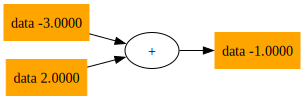

In [33]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

# expression
d = a+b
print(f"{d = }\n")
draw_dot(d)

In [34]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

# expression
d = a*b + c

nodes = {Value(data=10.0), Value(data=-3.0), Value(data=2.0), Value(data=4.0), Value(data=-6.0)}, edges = {(Value(data=2.0), Value(data=-6.0)), (Value(data=10.0), Value(data=4.0)), (Value(data=-3.0), Value(data=-6.0)), (Value(data=-6.0), Value(data=4.0))}
node = Value(data=10.0)
uid = '2556097655376'
node = Value(data=-3.0)
uid = '2556097649760'
node = Value(data=2.0)
uid = '2556097656432'
node = Value(data=4.0)
uid = '2556097650384'
n._op = '+'
node = Value(data=-6.0)
uid = '2556097655088'
n._op = '*'
n1 = Value(data=2.0), n2 = Value(data=-6.0)
n1 = Value(data=10.0), n2 = Value(data=4.0)
n1 = Value(data=-3.0), n2 = Value(data=-6.0)
n1 = Value(data=-6.0), n2 = Value(data=4.0)
dot = <graphviz.graphs.Digraph object at 0x00000253234AF5E0>


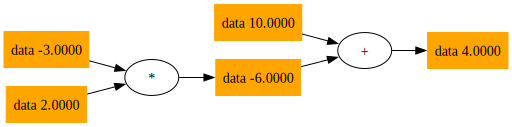

In [35]:
draw_dot(d)

nodes = {Value(data=2.0)}, edges = set()
node = Value(data=2.0)
uid = '2556097656432'
dot = <graphviz.graphs.Digraph object at 0x00000253234AFCA0>


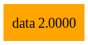

In [36]:
draw_dot(a)

nodes = {Value(data=-6.0), Value(data=-3.0), Value(data=2.0)}, edges = {(Value(data=2.0), Value(data=-6.0)), (Value(data=-3.0), Value(data=-6.0))}
node = Value(data=-6.0)
uid = '2556097038656'
n._op = '*'
node = Value(data=-3.0)
uid = '2556096819936'
node = Value(data=2.0)
uid = '2556096813936'
n1 = Value(data=2.0), n2 = Value(data=-6.0)
n1 = Value(data=-3.0), n2 = Value(data=-6.0)
dot = <graphviz.graphs.Digraph object at 0x00000253234AF1C0>


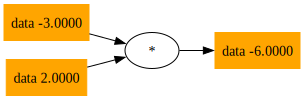

In [37]:
draw_dot(z)

nodes = {Value(data=-3.0), Value(data=-46.0), Value(data=-16.0), Value(data=-6.0), Value(data=2.0), Value(data=-30.0), Value(data=10.0)}, edges = {(Value(data=-6.0), Value(data=-16.0)), (Value(data=-3.0), Value(data=-30.0)), (Value(data=10.0), Value(data=-30.0)), (Value(data=-16.0), Value(data=-46.0)), (Value(data=2.0), Value(data=-6.0)), (Value(data=-3.0), Value(data=-6.0)), (Value(data=-30.0), Value(data=-46.0)), (Value(data=10.0), Value(data=-16.0))}
node = Value(data=-3.0)
uid = '2556097296944'
node = Value(data=-46.0)
uid = '2556097298000'
n._op = '+'
node = Value(data=-16.0)
uid = '2556097295072'
n._op = '-'
node = Value(data=-6.0)
uid = '2556097297136'
n._op = '*'
node = Value(data=2.0)
uid = '2556097297712'
node = Value(data=-30.0)
uid = '2556097296224'
n._op = '*'
node = Value(data=10.0)
uid = '2556097297904'
n1 = Value(data=-6.0), n2 = Value(data=-16.0)
n1 = Value(data=-3.0), n2 = Value(data=-30.0)
n1 = Value(data=10.0), n2 = Value(data=-30.0)
n1 = Value(data=-16.0), n2 = Val

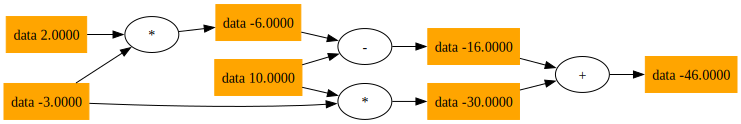

In [38]:
draw_dot(complex_eg)

# Updating Value Obj
## assigning label

In [39]:
# Value Obj

class Value:
    

    def __init__( self, data, _children=(), _operation='', label='' ):
        self.data = data
        self._prev = set(_children)
        self._op = _operation
        self.label = label
        
    # represents nicer looking expressions    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, otherObj):
        # return NEW Value Obj 
        out = Value(self.data + otherObj.data, (self, otherObj), '+' )
        return out
    
    def __mul__(self, otherObj):
        out = Value(self.data * otherObj.data, (self, otherObj), '*')
        return out
    
    def __sub__(self, otherObj):
        out = Value(self.data - otherObj.data, (self, otherObj), '-')
        return out

In [40]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

# expression
e = a*b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')

L = d*f ; L.label='L'
L

Value(data=-8.0)

In [41]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right, TB = Top to Bottom

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data, ), shape='record')
        if n._op:
            # if this value is result of some operation , create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
            
    for n1, n2 in edges:
        # connect n1 node to op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

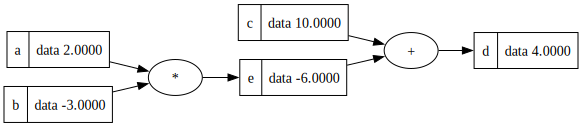

In [42]:
draw_dot(d)

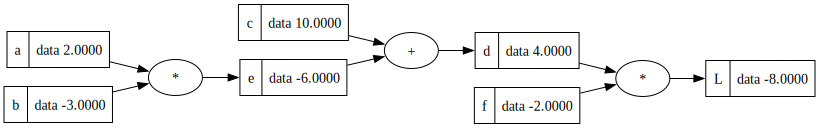

In [43]:
draw_dot(L)

In [44]:
print(draw_dot(L))

digraph {
	graph [rankdir=LR]
	2556097653792 [label="{ c | data 10.0000 }" shape=record]
	2556097645632 [label="{ d | data 4.0000 }" shape=record]
	"2556097645632+" [label="+"]
	"2556097645632+" -> 2556097645632
	2556097650816 [label="{ L | data -8.0000 }" shape=record]
	"2556097650816*" [label="*"]
	"2556097650816*" -> 2556097650816
	2556097654464 [label="{ a | data 2.0000 }" shape=record]
	2556097642704 [label="{ e | data -6.0000 }" shape=record]
	"2556097642704*" [label="*"]
	"2556097642704*" -> 2556097642704
	2556097657680 [label="{ f | data -2.0000 }" shape=record]
	2556097655136 [label="{ b | data -3.0000 }" shape=record]
	2556097645632 -> "2556097650816*"
	2556097655136 -> "2556097642704*"
	2556097642704 -> "2556097645632+"
	2556097654464 -> "2556097642704*"
	2556097657680 -> "2556097650816*"
	2556097653792 -> "2556097645632+"
}



In [45]:
# Value Obj

class Value:
    
    def __init__( self, data, _children=(), _operation='', label='' ):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _operation
        self.label = label
        
    # represents nicer looking expressions    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, otherObj):
        # return NEW Value Obj 
        out = Value(self.data + otherObj.data, (self, otherObj), '+' )
        return out
    
    def __mul__(self, otherObj):
        out = Value(self.data * otherObj.data, (self, otherObj), '*')
        return out
    
    def __sub__(self, otherObj):
        out = Value(self.data - otherObj.data, (self, otherObj), '-')
        return out

In [46]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

# expression
e = a*b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')

L = d*f ; L.label='L'
L

Value(data=-8.0)

In [47]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right, TB = Top to Bottom

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad ), shape='record')
        if n._op:
            # if this value is result of some operation , create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
            
    for n1, n2 in edges:
        # connect n1 node to op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

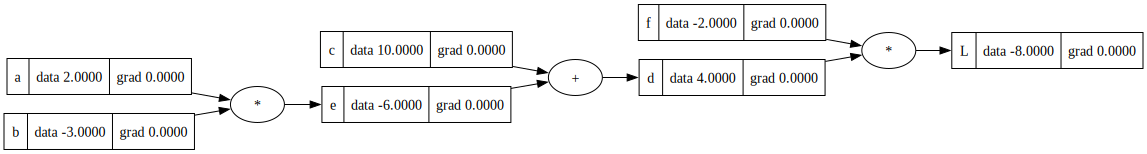

In [48]:
draw_dot(L)
# grad represents derivative of o/p w.r.t these values
# e.g: grad represents derivative of L w.r.t d as well as f

In [49]:
def lol():
    
    h = 0.001
    
    a = Value(2.0,label="a")
    b = Value(-3.0,label="b")
    c = Value(10,label="c")
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data
    
    a = Value(2.0,label="a") 
    b = Value(-3.0,label="b")
    c = Value(10,label="c")
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    d.data += h; # small increment in d
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L2 = L.data
    
    print((L2 - L1)/h)

# derivative of 'L' w.r.t. 'd'
lol()

-2.000000000000668


In [50]:
# L = d * f
# derivative of L w.r.t. d: 
#     dL/dd = 1 * f
#     dL/dd = -2

# Also:
#     (f(x+h) - f(x))/h
#     ((d+h)*f - d*f)/h
#     (d*f + h*f - d*f)/h
#     (h*f)/h
#     f
#     -2

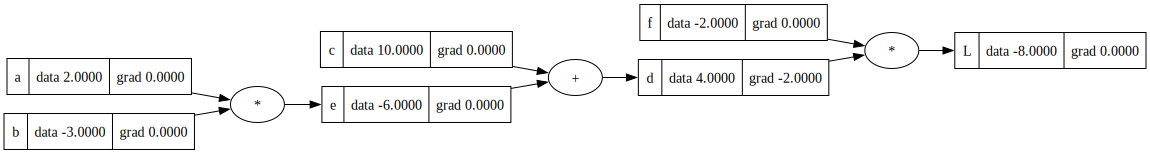

In [51]:
# Therefore
d.grad = -2.0
draw_dot(L)

In [52]:
# Similarly
def lol():
    
    h = 0.001
    
    a = Value(2.0,label="a")
    b = Value(-3.0,label="b")
    c = Value(10,label="c")
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data
    
    a = Value(2.0,label="a") 
    b = Value(-3.0,label="b")
    c = Value(10 + h,label="c") # small increment in c
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L2 = L.data
    
    print((L2 - L1)/h)

# derivative of 'L' w.r.t. 'c'
lol()

-1.9999999999988916


In [53]:
# L = d * f
# L = (e+c) * f
# (by chain rule...)
# derivative of L w.r.t. c: 
#     dL/dc = (dL/dd) * (dd/dc)
#     dL/dc = -2 * (de/dc + dc/dc)
#     dL/dc = -2 * (0 + 1)
#     dL/dc = -2 

# Also:
#     (f(x+h) - f(x))/h
#     ((e + (c+h))*f - ((e+c)*f))/h
#     ((e*f+c*f+h*f) - (e*f + c*f))/h
#     (h*f)/h
#     f
#     -2

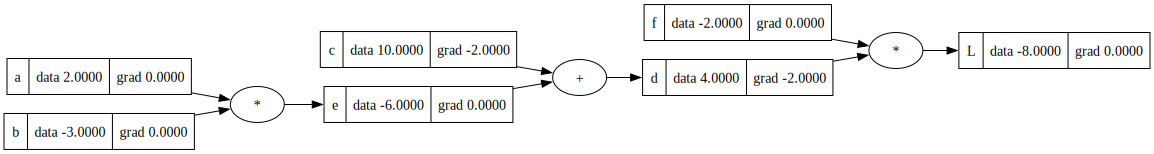

In [54]:
# Therefore
c.grad = -2.0
draw_dot(L)

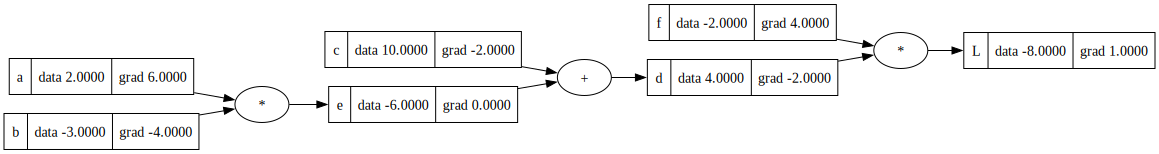

In [55]:
# Similarly
a.grad = 6.0
b.grad = -4.0
c.grad = -2.0
f.grad = 4.0
L.grad = 1.0

draw_dot(L)

![neuron_model](https://www.cs.toronto.edu/~lczhang/360/lec/w02/imgs/neuron_model.jpeg)


### Understanding Neurons in Machine Learning

In machine learning, a neuron, also known as a node or unit, is a fundamental building block of artificial neural networks (ANNs). Inspired by biological neurons, these computational units process input data and produce an output signal, which serves as input to subsequent layers or the final output of the network.

#### Anatomy of a Neuron:

A typical neuron consists of the following components:

1. **Inputs (x)**: Neurons receive input signals from other neurons or directly from the input data. Each input is associated with a weight that determines its contribution to the neuron's output.

2. **Weights (w)**: Weights represent the strength of connections between neurons. They are adjustable parameters learned during the training process, allowing the network to adapt and optimize its performance.

3. **Activation Function (f)**: The activation function determines the output of the neuron based on the weighted sum of its inputs. Common activation functions include sigmoid, tanh, ReLU, and softmax, each with its own properties and use cases.

4. **Bias (b)**: The bias is an additional parameter added to the weighted sum before applying the activation function. It allows the neuron to learn an offset from zero, providing flexibility in modeling complex relationships in the data.

5. **Output (y)**: The output of the neuron is the result of applying the activation function to the weighted sum of inputs and bias. It represents the neuron's response to the input data.

#### Neuron Operation:

The operation of a neuron can be summarized as follows:

1. **Input Aggregation**: The neuron calculates the weighted sum of its inputs, incorporating the contribution of each input based on its associated weight.

2. **Adding Bias**: The bias term is added to the weighted sum, allowing the neuron to learn an offset from zero.

3. **Activation**: The neuron applies an activation function to the aggregated input, transforming it into the neuron's output signal.

4. **Output**: The resulting output signal is propagated to the next layer of neurons or serves as the final output of the network.

#### Role in Neural Networks:

Neurons form the basic computational units of neural networks, enabling the network to learn and model complex patterns in data. By adjusting the weights and biases of neurons through training, neural networks can perform tasks such as classification, regression, and pattern recognition.

#### Conclusion:

In summary, neurons are the building blocks of artificial neural networks, responsible for processing input data and producing output signals through weighted summation and activation. Understanding the operation and characteristics of neurons is essential for effectively designing and training neural network models.


### Understanding the Hyperbolic Tangent (tanh) Function

The hyperbolic tangent function, often denoted as \\( \text{tanh}(x) \\), is a fundamental component in machine learning, particularly in neural networks. It serves as an activation function, transforming input values into a bounded output range.

#### Function Definition:
The tanh function is defined mathematically as:

\\[ \text{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{e^{2x} - 1}{e^{2x} + 1}\\]

#### Key Characteristics:

1. **Range**: The tanh function maps real-valued numbers to the interval [-1, 1]. This property makes it useful when outputs need to be limited to a specific range, facilitating stable learning in neural networks.

2. **Zero-centered**: Unlike the sigmoid function, tanh outputs are zero-centered. This feature aids in mitigating issues like the vanishing gradient problem during neural network training.

3. **S-shaped Curve**: Similar to the sigmoid function, tanh exhibits an S-shaped curve. This non-linear behavior enables neural networks to model complex relationships in the data.

4. **Vanishing Gradients**: While tanh can help alleviate the vanishing gradient problem compared to sigmoid, it may still encounter gradient vanishing issues in deep networks.

#### Derivative:
The derivative of the tanh function is given by:
\\[ \frac{d}{dx} \text{tanh}(x) = 1 - \text{tanh}^2(x) \\]

This derivative is crucial in the backpropagation algorithm for updating network weights during training.

#### Conclusion:
In summary, the tanh function is a versatile activation function widely employed in neural networks. Its bounded output range, zero-centered nature, and non-linear characteristics make it a valuable tool for learning complex patterns from data.


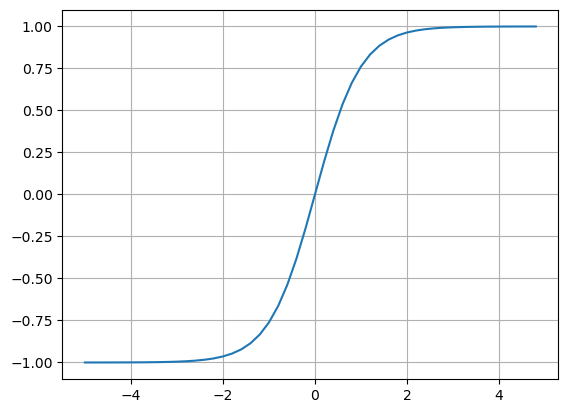

In [56]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)))
plt.grid()

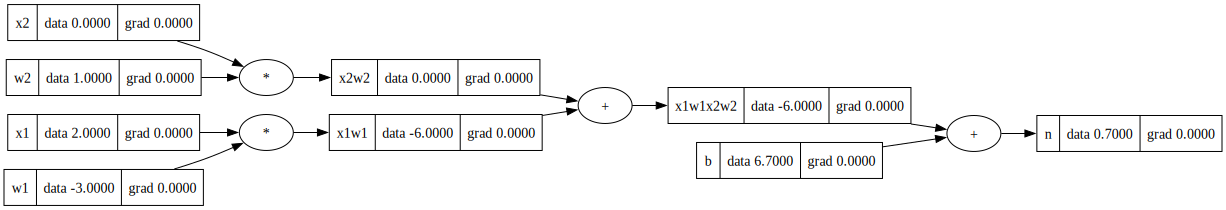

In [57]:
# Inputs
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# Weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.7, label='b')
# x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1x2w2'
n = x1w1x2w2 + b; n.label='n'

draw_dot(n)

####
####


#### updating Value:  adding tanh

In [58]:
import math

class Value:
    
    def __init__( self, data, _children=(), _operation='', label='' ):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _operation
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, otherObj):
        out = Value(self.data + otherObj.data, (self, otherObj), '+' )
        return out
    
    def __mul__(self, otherObj):
        out = Value(self.data * otherObj.data, (self, otherObj), '*')
        return out
    
    def __sub__(self, otherObj):
        out = Value(self.data - otherObj.data, (self, otherObj), '-')
        return out
        
    # tanh(x) = (e^2x - 1) / (e^2x + 1)
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')
        return out

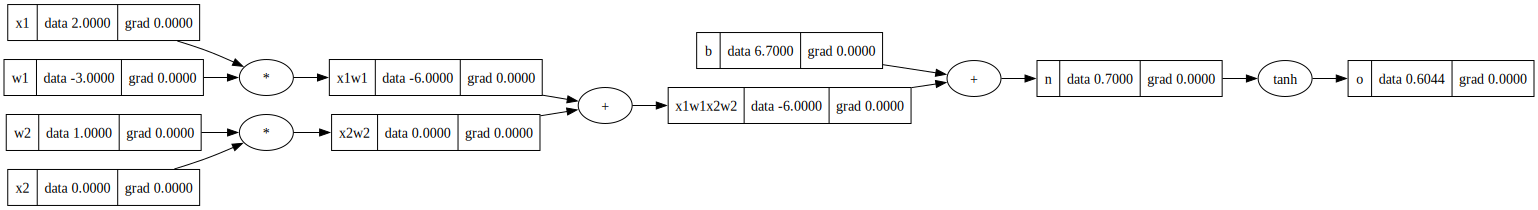

In [59]:
# Inputs
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# Weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.7, label='b')
# x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1x2w2'
n = x1w1x2w2 + b; n.label='n'

o = n.tanh(); o.label='o'
draw_dot(o)

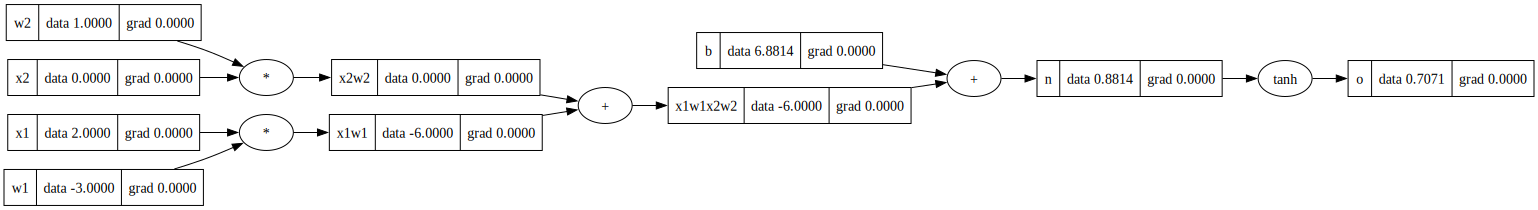

In [60]:
# Inputs
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# Weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1x2w2'
n = x1w1x2w2 + b; n.label='n'

o = n.tanh(); o.label='o'
draw_dot(o)

### Manual Backpropagation: neuron

In [61]:
# derivate of 'o' wrt 'o':
o.grad = 1.0

# o = tanh(n)
# derivate of 'o' wrt 'n':
# do/dn = 1 - o**2

1 - (o.data**2)

0.4999999999999999

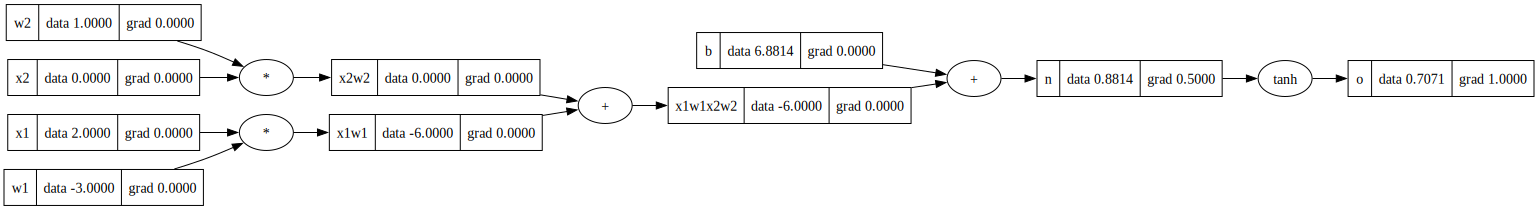

In [62]:
n.grad = 0.5
draw_dot(o)

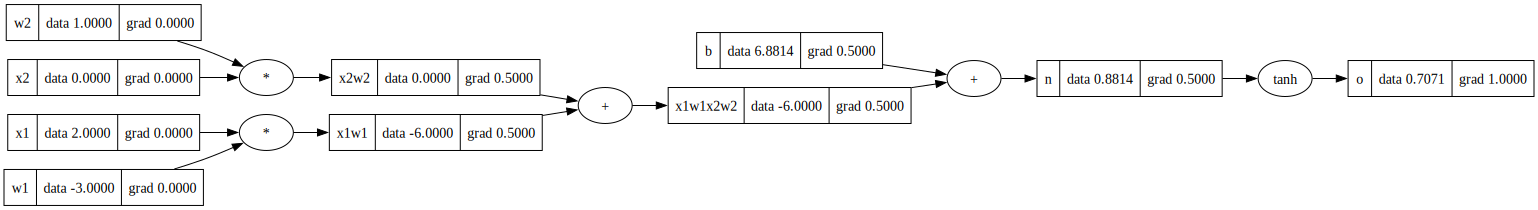

In [63]:
b.grad = 0.5
x1w1x2w2.grad = 0.5

x1w1.grad = 0.5
x2w2.grad = 0.5

draw_dot(o)

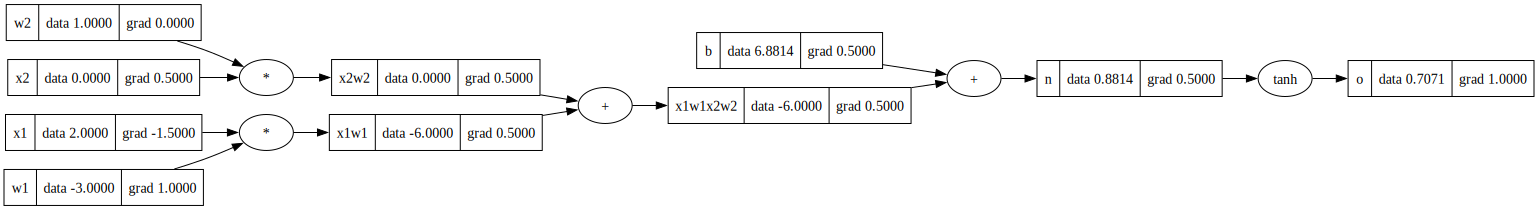

In [64]:
# x2.grad = do/dx2w2 * dx2w2/dx2
x2.grad = 0.5 * 1.0
# w2.grad = do/dx2w2 * dx2w2/dw2
w2.grad = 0.5 * 0.0

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

draw_dot(o)

#
#

Updating Value: adding backward function for each operation

In [65]:
class Value:
    
    def __init__( self, data, _children=(), _operation='', label='' ):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _operation
        self._backward = lambda: None 
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, otherObj):
        out = Value(self.data + otherObj.data, (self, otherObj), '+' )
        # backward logic for addition
        def _backward():
            self.grad += 1.0 * out.grad     # "+=" because we need to accumulate gradients 
            otherObj.grad += 1.0 * out.grad
        out._backward = _backward 
        return out
    
    def __mul__(self, otherObj):
        out = Value(self.data * otherObj.data, (self, otherObj), '*')
        # backward logic for multiplication
        def _backward():
            self.grad += otherObj.data * out.grad
            otherObj.grad += self.data * out.grad
        out._backward = _backward 
        return out
     
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')
        # backward logic for tanh function
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward 
        return out

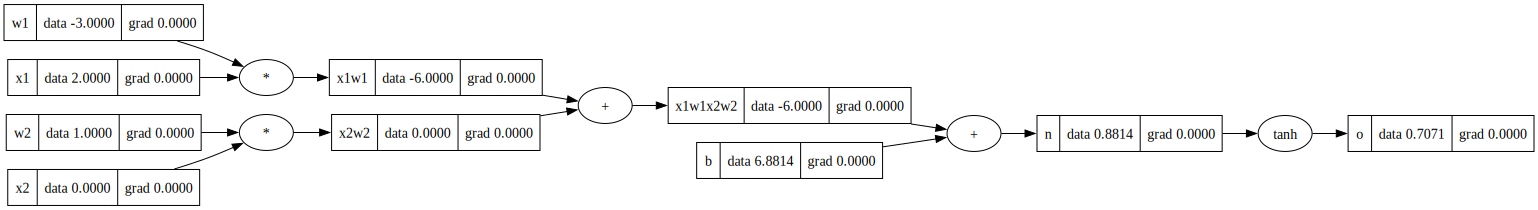

In [66]:
# Inputs
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# Weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1x2w2'
n = x1w1x2w2 + b; n.label='n'

o = n.tanh(); o.label='o'
draw_dot(o)

In [67]:
o.grad = 1.0 # setting '1.0', because by default it is '0.0'
o._backward()

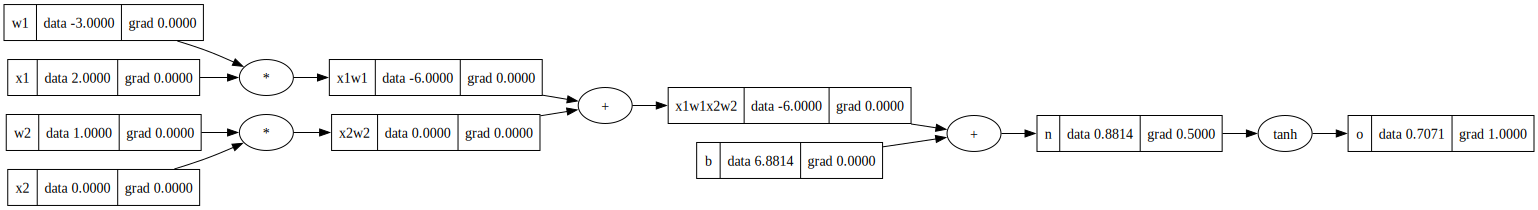

In [68]:
draw_dot(o)

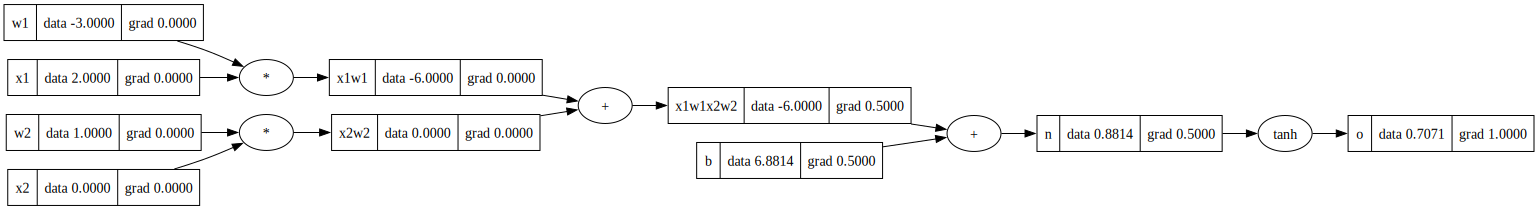

In [69]:
n._backward()
draw_dot(o)

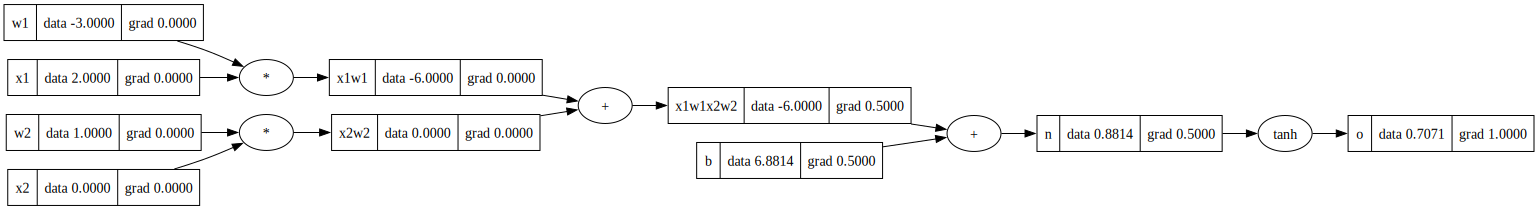

In [70]:
b._backward()
draw_dot(o)

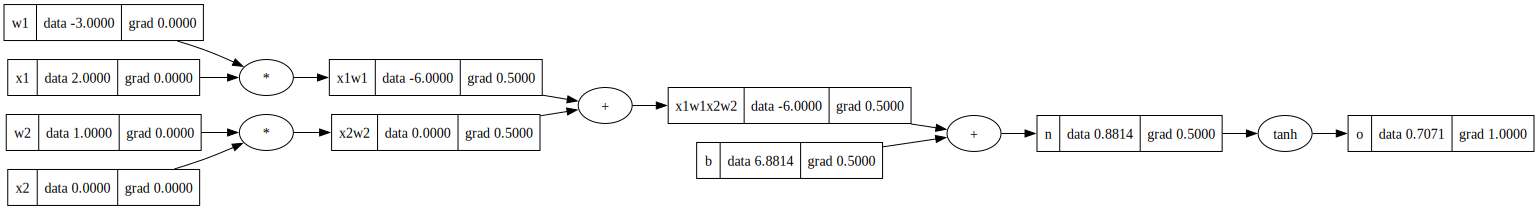

In [71]:
x1w1x2w2._backward()
draw_dot(o)

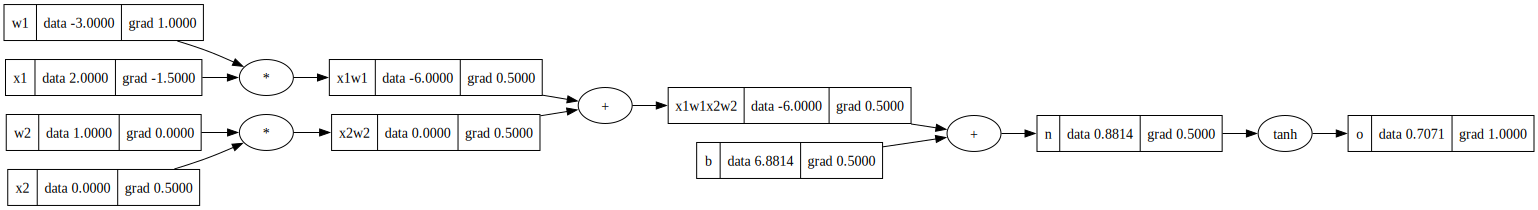

In [72]:
x1w1._backward()
x2w2._backward()
draw_dot(o)

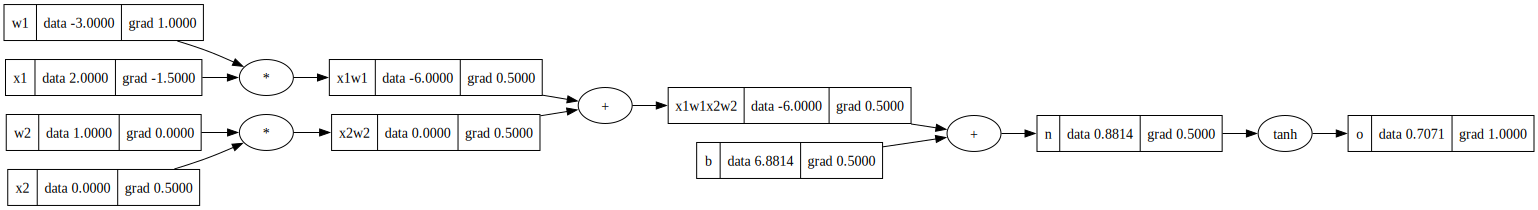

In [73]:
draw_dot(o)

---
---

## Topological Sort


Topological sort is a technique used to order the vertices of a directed graph in such a way that for every directed edge u → v, vertex u comes before vertex v in the ordering. It is applicable only to directed acyclic graphs (DAGs), where no cycles are present.

In [74]:
# Initialize an empty list to store topologically sorted nodes
topo = []
# Initialize a set to keep track of visited nodes during topological sorting
visited = set()
# Define a function to recursively build the topological sort
def build_topo(v):
    if v not in visited:  # Check if the node has already been visited
        visited.add(v)    # Mark the current node as visited
        for child in v._prev:  # Iterate through the predecessors of the current node
            build_topo(child)  # Recursively call build_topo for each predecessor
        topo.append(v)  # Add the current node to the topologically sorted list

# Build the topological sort starting from the output node 'o'
build_topo(o)
topo

[Value(data=6.881373587019543),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

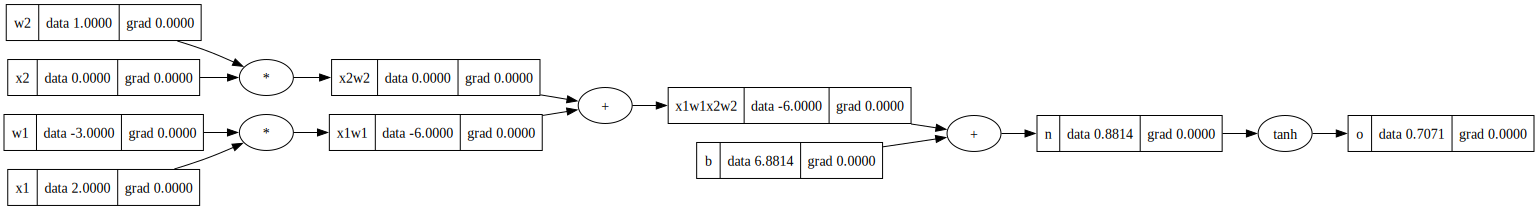

In [75]:
# Inputs
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# Weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1x2w2'
n = x1w1x2w2 + b; n.label='n'

o = n.tanh(); o.label='o'
draw_dot(o)

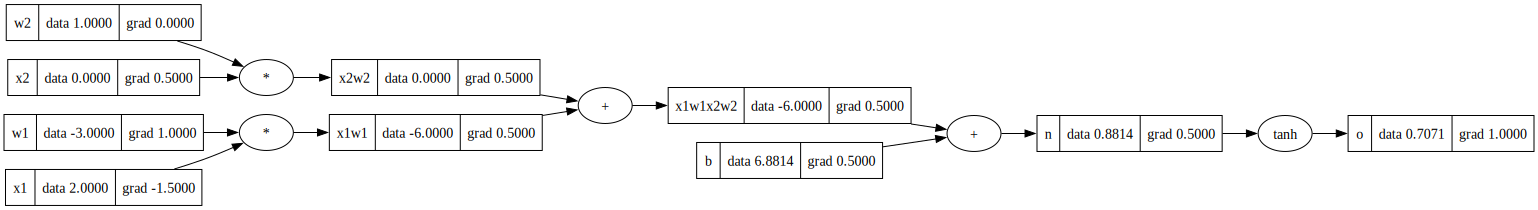

In [76]:
# Set the gradient of the output node to 1.0
o.grad = 1.0 

# Initialize an empty list to store topologically sorted nodes
topo = []

# Initialize a set to keep track of visited nodes during topological sorting
visited = set()

# Define a function to recursively build the topological sort
def build_topo(v):
    if v not in visited:  # Check if the node has already been visited
        visited.add(v)    # Mark the current node as visited
        for child in v._prev:  # Iterate through the predecessors of the current node
            build_topo(child)  # Recursively call build_topo for each predecessor
        topo.append(v)  # Add the current node to the topologically sorted list

# Build the topological sort starting from the output node 'o'
build_topo(o)
        
# Iterate through the topologically sorted nodes in reversed order
for node in reversed(topo):
    node._backward()  # Perform backpropagation for each node

# Visualize
draw_dot(o)

#
#
---
#
#

updating Value: adding backpropagation

In [77]:
class Value:
    
    def __init__( self, data, _children=(), _operation='', label='' ):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _operation
        self._backward = lambda: None 
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, otherObj):
        out = Value(self.data + otherObj.data, (self, otherObj), '+' )
        # backward logic for addition
        def _backward():
            self.grad += 1.0 * out.grad     # "+=" because we need to accumulate gradients 
            otherObj.grad += 1.0 * out.grad
        out._backward = _backward 
        return out
    
    def __mul__(self, otherObj):
        out = Value(self.data * otherObj.data, (self, otherObj), '*')
        # backward logic for multiplication
        def _backward():
            self.grad += otherObj.data * out.grad
            otherObj.grad += self.data * out.grad
        out._backward = _backward 
        return out
        
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')
        # backward logic for tanh function
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward 
        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0 
        for node in reversed(topo):
            node._backward()

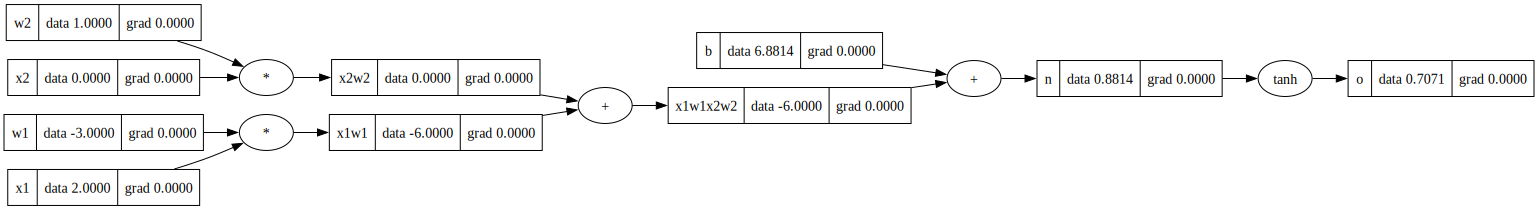

In [78]:
# Inputs
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# Weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1x2w2'
n = x1w1x2w2 + b; n.label='n'

o = n.tanh(); o.label='o'
draw_dot(o)

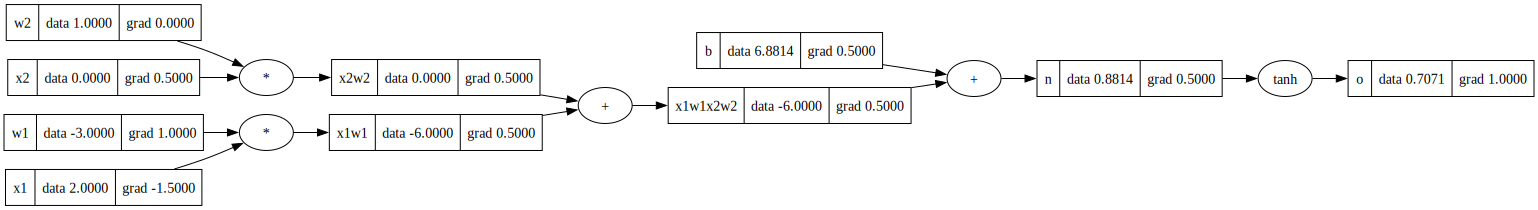

In [79]:
o.backward()
draw_dot(o)